<a href="https://colab.research.google.com/github/ashwinigit123/CSE6324Team5/blob/main/Iteration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ashwinigit123/CSE6324Team5/main/MATC_Projects.csv'
df1 = pd.read_csv(url)
df1.head()

,id,title,author_name,mathworks_url,summary,content,category,author_uri,published,updated,no_of_comments,no_of_ratings,average_rating,downloads,download_link,license,model_files,num_model_file
0,261,RF Design and Analysis,Jackson Harvey,https://www.mathworks.com/matlabcentral/fileex...,"A collection of functions, scripts, & Simulink...",<p>This is a collection of MATLAB functions an...,NaN,https://www.mathworks.com/matlabcentral/profil...,2001-07-23 12:51:25.000000,2001-07-23 12:51:25.000000,18,46,4,3,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, Jackson Harvey\nAll rights...","RF.mdl,",1
1,266,smxl,Giampiero Campa,https://www.mathworks.com/matlabcentral/fileex...,The Simulink MatriX Library (SMXL) - a collect...,<p>SMXL (Simulink MatriX Library) it's a power...,NaN,https://www.mathworks.com/matlabcentral/profil...,2007-10-23 08:01:38.000000,2007-10-23 08:01:38.000000,3,4,4,1,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 1999, Giampiero Campa\nAll right...","smxl.mdl,examples/vrsvdex.mdl,examples/vrranke...",15
2,268,trimmod,Joerg Buchholz,https://www.mathworks.com/matlabcentral/fileex...,TrimMod finds the trim point (equilibrium) of ...,<p>TrimMod finds the trim point (equilibrium) ...,NaN,https://www.mathworks.com/matlabcentral/profil...,2017-03-17 11:54:23.000000,2017-03-17 11:54:23.000000,1,2,5,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2009, Joerg Buchholz\nAll rights...",trimmod/trimtest/trimtest_with_vector_outport....,2
3,722,Bluetooth modulation and frequency hopping,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:04.000000,2016-09-01 15:00:04.000000,21,22,4,12,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","bluetooth.mdl,R12.1 Original Version/bluetooth...",2
4,724,DTMF generator and receiver,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:05.000000,2016-09-01 15:00:05.000000,11,27,3,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","dtmf.mdl,R12.1 Original Version/dtmf.mdl,",2


In [130]:
df1['summary']

0       A collection of functions, scripts, & Simulink...
1       The Simulink MatriX Library (SMXL) - a collect...
2       TrimMod finds the trim point (equilibrium) of ...
3              Bluetooth modulation and frequency hopping
4                             DTMF generator and receiver
                              ...                        
2719    A very basic example of physical modeling in S...
2720    I2C sensors can be read directly in Simulink u...
2721    This is the Ball on Plate Simscape Model, Cont...
2722                                  Single Phase dimmer
2723    ِABB Automatic Generation Control (frequency r...
Name: summary, Length: 2724, dtype: object

In [131]:
df1['category'].isnull().sum()

88

In [132]:
df1.shape

(2724, 18)

In [133]:
df1 = df1.dropna()
df1.shape

(2636, 18)

In [134]:
df1['category'].isnull().sum()

0

In [135]:
# removing everything except alphabets`
df1['cat'] = df1['category'].str.replace("[^a-zA-Z#]", " ")


In [136]:
df1['cat']

3       bluetooth frequency hopping network wireless b...
4       communications dtmf dual tone multi frequency ...
5       cdma is  a phy pn pn string power control reve...
6       is  a call processing mobile phone is  a call ...
7            b bluetooth cvsd frequency hopping matlab...
                              ...                        
2717    electrical vehicle ev fast battery charging fu...
2718                                  buck dc synchronous
2719                        longitudinal vehicle dynamics
2720    accelerometer arduino deflection i c mma     m...
2721      ball on plate diagnostic pid sfunction simscape
Name: cat, Length: 2636, dtype: object

In [137]:
# removing null fields
df1 = df1[df1['cat'].notnull()]
# removing short words
#news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# make all text lowercase
#news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [138]:
df1['cat'] = df1['cat'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df1['cat'] = df1['cat'].apply(lambda x: x.lower())

In [139]:
df1['cat']

3       bluetooth frequency hopping network wireless b...
4       communications dtmf dual tone multi frequency ...
5       cdma string power control reverse traffic simu...
6       call processing mobile phone call processing m...
7       bluetooth cvsd frequency hopping matlab simuli...
                              ...                        
2717    electrical vehicle fast battery charging fuzzy...
2718                                     buck synchronous
2719                        longitudinal vehicle dynamics
2720    accelerometer arduino deflection real time sim...
2721             ball plate diagnostic sfunction simscape
Name: cat, Length: 2636, dtype: object

In [140]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
tokenized_doc = df1['cat'].apply(lambda x: x.split())
print(tokenized_doc)

3       [bluetooth, frequency, hopping, network, wirel...
4       [communications, dtmf, dual, tone, multi, freq...
5       [cdma, string, power, control, reverse, traffi...
6       [call, processing, mobile, phone, call, proces...
7       [bluetooth, cvsd, frequency, hopping, matlab, ...
                              ...                        
2717    [electrical, vehicle, fast, battery, charging,...
2718                                  [buck, synchronous]
2719                    [longitudinal, vehicle, dynamics]
2720    [accelerometer, arduino, deflection, real, tim...
2721       [ball, plate, diagnostic, sfunction, simscape]
Name: cat, Length: 2636, dtype: object


In [142]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)

3       [bluetooth, frequency, hopping, network, wirel...
4       [communications, dtmf, dual, tone, multi, freq...
5       [cdma, string, power, control, reverse, traffi...
6       [call, processing, mobile, phone, call, proces...
7       [bluetooth, cvsd, frequency, hopping, matlab, ...
                              ...                        
2717    [electrical, vehicle, fast, battery, charging,...
2718                                  [buck, synchronous]
2719                    [longitudinal, vehicle, dynamics]
2720    [accelerometer, arduino, deflection, real, tim...
2721       [ball, plate, diagnostic, sfunction, simscape]
Name: cat, Length: 2636, dtype: object


In [143]:
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)

['bluetooth frequency hopping network wireless bluetooth frequency hopping network wireless bluetooth hopping wireless bluetooth frequency frequency bluetooth', 'communications dtmf dual tone multi frequency simulink dtmf dual tone', 'cdma string power control reverse traffic simulink stateflow wireless cdma cdma power control power control string', 'call processing mobile phone call processing mobile phone seminar wireless call processing mobile phone call processing mobile phone', 'bluetooth cvsd frequency hopping matlab simulink voice wireless bluetooth cvsd frequency hopping matlab simulink voice bluetooth bluetooth', 'fuzzy neural networks suren adaptive neural networks adaline adaptive neural networks ebpa fuzzy logic mran neural networks neural networks adaline neural networks', 'filters filters signal signal processing time frequency wavelets wavelets simulink', 'marine simulation submarine underwater vehicle', 'flow fluid hydraulic line pipeline pressure simulation flow fluid 

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df = 0.5, use_idf = True, ngram_range=(1,3))
X = vectorizer.fit_transform(detokenized_doc)
print(X.shape) # check shape of the document-term matrix


(2565, 23134)


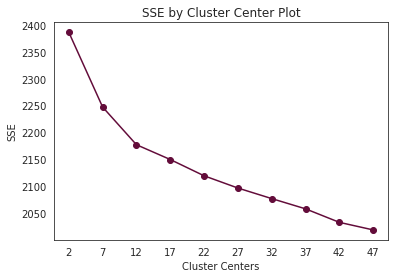

In [145]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 5)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 50)

In [146]:
from sklearn.cluster import KMeans
import numpy as np
num_clusters = 12
km = KMeans(n_clusters=num_clusters)
km.fit(X)
#clusters = km.labels_.tolist()
clusters = km.predict(X)
labels = np.unique(clusters)
print(np.unique(clusters))
print(km.cluster_centers_)

print(clusters.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00123945 0.00032094 ... 0.00032785 0.00036934 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(2565,)


In [147]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
print(dist)

[[ 1.11022302e-16  9.73715975e-01  9.80365143e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 9.73715975e-01  0.00000000e+00  9.98433808e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 9.80365143e-01  9.98433808e-01 -4.44089210e-16 ...  9.95143312e-01
   1.00000000e+00  1.00000000e+00]
 ...
 [ 1.00000000e+00  1.00000000e+00  9.95143312e-01 ...  0.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
  -2.22044605e-16  1.70710880e-01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.70710880e-01  0.00000000e+00]]


In [148]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
print("centroids:",order_centroids)
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
centroids: [[19202 19393  7704 ... 15425 15426     0]
 [ 3349 16002  4060 ... 14413 14414     0]
 [ 4597 16002  1879 ... 15275 15276     0]
 ...
 [18952  7446  7130 ... 15420 15421     0]
 [12507 12535 18952 ... 15384 15385     0]
 [ 1485 12053  1547 ... 15346 15347     0]]
Cluster 0:
 simulink
 simulink simulink
 energymanagemnet
 energymanagemnet system
 energymanagemnet system basedon
 engine
 engine control
 engine control control
 engine modeling
 engine modeling simulation
Cluster 1:
 control
 power
 control power
 motor
 electronics
 power electronics
 control power electronics
 electronics control
 power electronics control
 electric
Cluster 2:
 converter
 power
 boost
 control
 buck
 boost converter
 buck converter
 electronics
 power electronics
 control boost
Cluster 3:
 simulink
 control
 design
 control design
 simulation
 matlab
 inverter
 power
 simulation simulink
 automotive
Cluster 4:
 modeling
 modeling simulation
 modeling simulation simulink


In [149]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X, n_components=6, n_iter=100,
                              random_state=122)


In [150]:
print(km.cluster_centers_)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00123945 0.00032094 ... 0.00032785 0.00036934 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [151]:
pip install umap-learn


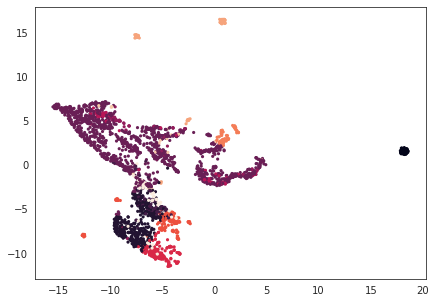

In [152]:
import umap
import seaborn as sns
X_topics=U*Sigma
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = clusters,
s = 10, # size
edgecolor='none'
)
plt.show()

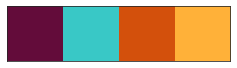

In [153]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [154]:

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [155]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5: '#e09738',6: '#edcd3b',7: '#3ae4f0',8: '#14d9ae', 9: '#e655bd', 10: '#d28feb', 11: '#f2dca7'}



No handles with labels found to put in legend.


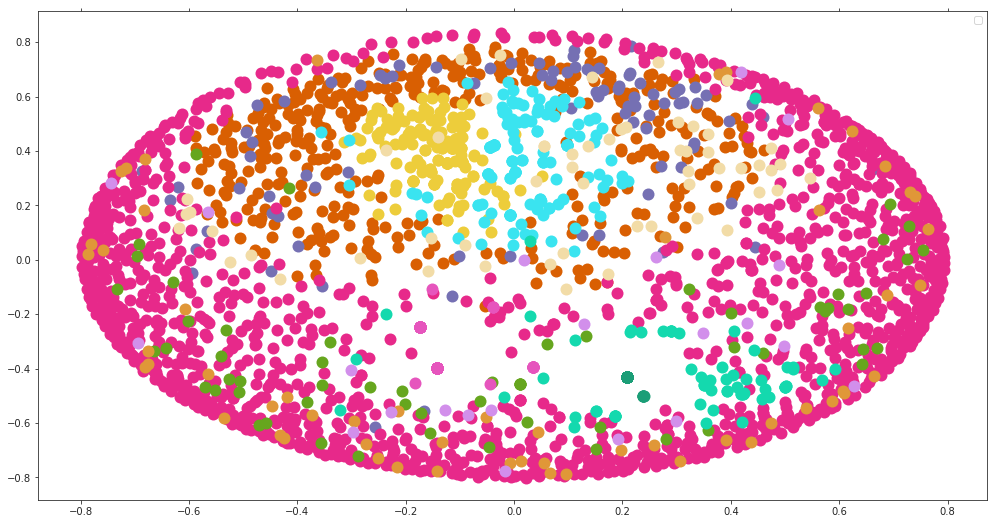

In [156]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
             color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point
  
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)